<a href="https://colab.research.google.com/github/starkjiang/TrAC-GNN/blob/main/networkx_pyg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NetworkX and PyTorch Geometric

In [7]:
"""Let us install networkx to play with graphs.
"""

# Intall networkx and PyTorch Geometric.
! pip install networkx
! pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


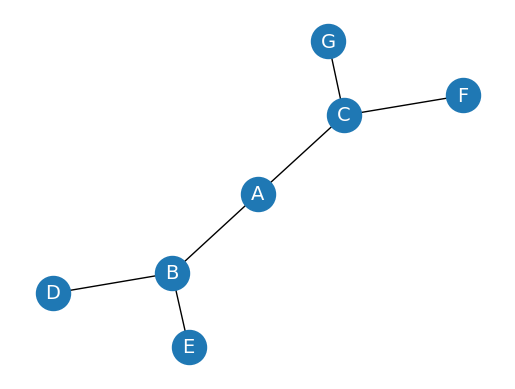

In [2]:
# Create an undirected graph and visualize it.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [
        ('A', 'B'),
        ('A', 'C'),
        ('B', 'D'),
        ('B', 'E'),
        ('C', 'F'),
        ('C', 'G')
    ]
)

plt.axis('off')
nx.draw_networkx(
    G,
    pos=nx.spring_layout(G, seed=0),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)

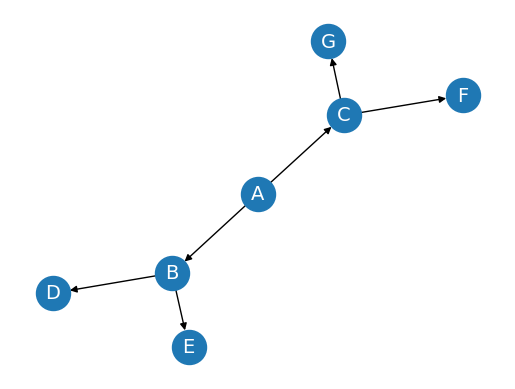

In [3]:
# Create a directed graph and visualize it.
DG = nx.DiGraph()
DG.add_edges_from(
    [
        ('A', 'B'),
        ('A', 'C'),
        ('B', 'D'),
        ('B', 'E'),
        ('C', 'F'),
        ('C', 'G')
    ]
)

plt.axis('off')
nx.draw_networkx(
    DG,
    pos=nx.spring_layout(G, seed=0),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)

{('A', 'B'): Text(-0.17062897224300366, -0.2578513560983575, '10'),
 ('A', 'C'): Text(0.1690871167597765, 0.25843018611299007, '20'),
 ('B', 'D'): Text(-0.5751300482618783, -0.5819109500526888, '30'),
 ('B', 'E'): Text(-0.30708797484122186, -0.7577037926506119, '40'),
 ('C', 'F'): Text(0.5743062636738074, 0.5815239970648829, '50'),
 ('C', 'G'): Text(0.3081456694549718, 0.7582993720664115, '60')}

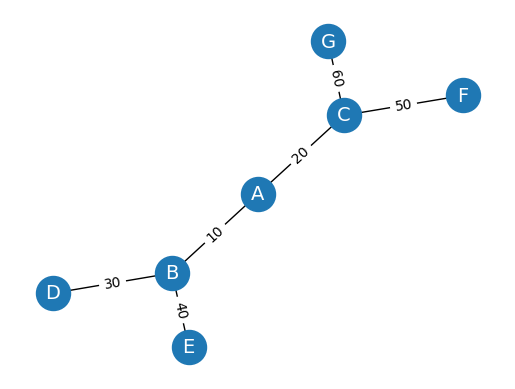

In [4]:
# Create a weighted undirected graph and visualize it.
WG = nx.Graph()
WG.add_edges_from(
    [
        ('A', 'B', {"weight": 10}),
        ('A', 'C', {"weight": 20}),
        ('B', 'D', {"weight": 30}),
        ('B', 'E', {"weight": 40}),
        ('C', 'F', {"weight": 50}),
        ('C', 'G', {"weight": 60})
    ]
)
labels = nx.get_edge_attributes(WG, "weight")

plt.axis('off')
nx.draw_networkx(
    WG,
    pos=nx.spring_layout(G, seed=0),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)
nx.draw_networkx_edge_labels(
    WG,
    pos=nx.spring_layout(G, seed=0),
    edge_labels=labels
)

In [5]:
# Ask questions about the above weighted graph.
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


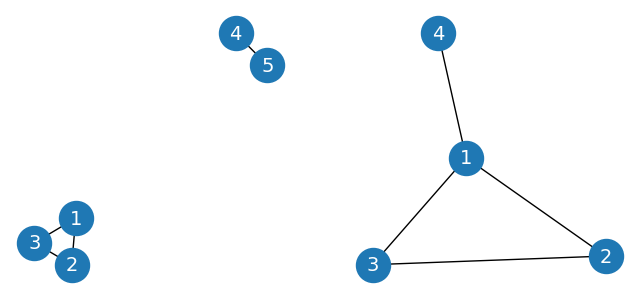

In [6]:
# Plot all the graphs.
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(
    G1,
    pos=nx.spring_layout(G1, seed=0),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(
    G2,
    pos=nx.spring_layout(G2, seed=0),
    node_size=600,
    cmap='coolwarm',
    font_size=14,
    font_color='white'
)

In [ ]:
# Create undirected and directed graphs and then calculate node degree.
G = nx.Graph()
G.add_edges_from(
    [
        ('A', 'B'),
        ('A', 'C'),
        ('B', 'D'),
        ('B', 'E'),
        ('C', 'F'),
        ('C', 'G')
    ]
)
print(f"deg(A) = {G.degree['A']}")

DG = nx.DiGraph()
DG.add_edges_from(
    [
        ('A', 'B'),
        ('A', 'C'),
        ('B', 'D'),
        ('B', 'E'),
        ('C', 'F'),
        ('C', 'G')
    ]
)
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2


In [ ]:
# Calculate some terminologies.
print(f"Degree centrality      = {nx.degree_centrality(G)}") # How many direct connections (edges) a node has.
print(f"Closeness centrality   = {nx.closeness_centrality(G)}") # How close a node is to all other nodes, based on shortest paths.
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}") # How often a node lies on the shortest paths between other nodes.

Degree centrality      = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [ ]:
# Get the adjacency matrix, Laplacian matrix, and degree matrix of G.
A = nx.adjacency_matrix(G).todense()
L = nx.laplacian_matrix(G).todense()
D = A+L
print(f"Adjacency matrix A = {A}")
print(f"Laplacian matrix L = {L}")
print(f"Degree matrix D = {D}")

Adjacency matrix A = [[0 1 1 0 0 0 0]
 [1 0 0 1 1 0 0]
 [1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
Laplacian matrix L = [[ 2 -1 -1  0  0  0  0]
 [-1  3  0 -1 -1  0  0]
 [-1  0  3  0  0 -1 -1]
 [ 0 -1  0  1  0  0  0]
 [ 0 -1  0  0  1  0  0]
 [ 0  0 -1  0  0  1  0]
 [ 0  0 -1  0  0  0  1]]
Degree matrix D = [[2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


In [ ]:
# Use built-in dataset from PyG, KarateClub to explore.
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [ ]:
# Get the first graph object.
data = dataset[0]

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [ ]:
# Print all edges.
edge_index = data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

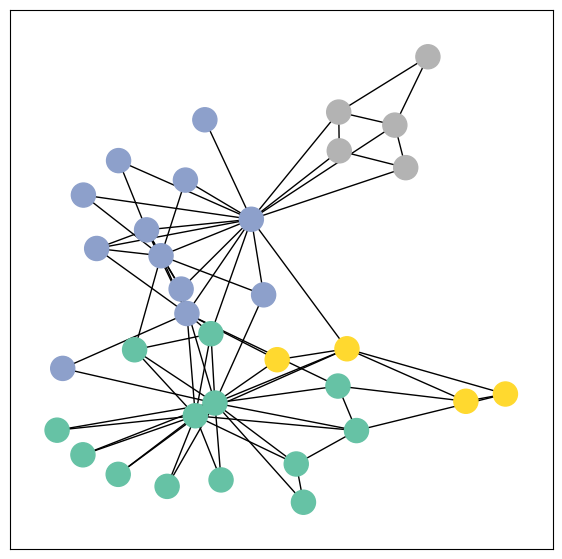

In [ ]:
# Alternatively, you can also use networkx from PyG.
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()
visualize_graph(G, color=data.y)